In [1]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
plt.style.use('ggplot')

## Use clustering from Tfidf+KMeans(n_clusters=10, seed=777)

![title](site_agg_output/clusters10-seed777/km_wclouds-FINAL.jpeg)

In [2]:
sites = pd.read_csv("site_agg_output/clusters10-seed777/clustered_websites.csv")
sites['Counts'] = [json.loads(counts_str.replace("'", '"')) for counts_str in sites['Counts']]

In [3]:
stops = TfidfVectorizer(stop_words='english').get_stop_words()
sites['Filt_counts'] = [
    {word: count for word, count in countsi.items() if word not in stops}
    for countsi in sites['Counts']
]

## Look into specific cluster

Picked Cluster 5 since it's worcloud had 

In [5]:
cluster_5 = sites[sites['KM_cluster'] == 4]

cluster_5['Filt_num_words'] = [sum(countsi.values()) for countsi in cluster_5['Filt_counts']]
cluster_5['Filt_num_unique_words'] = cluster_5['Filt_counts'].apply(len)

cluster_5['Num_pages'] = [texti.count(" | ") + 1 for texti in cluster_5['Text']]

<ipython-input-5-6fbb05d85981>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_5['Filt_num_words'] = [sum(countsi.values()) for countsi in cluster_5['Filt_counts']]
<ipython-input-5-6fbb05d85981>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_5['Filt_num_unique_words'] = cluster_5['Filt_counts'].apply(len)
<ipython-input-5-6fbb05d85981>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

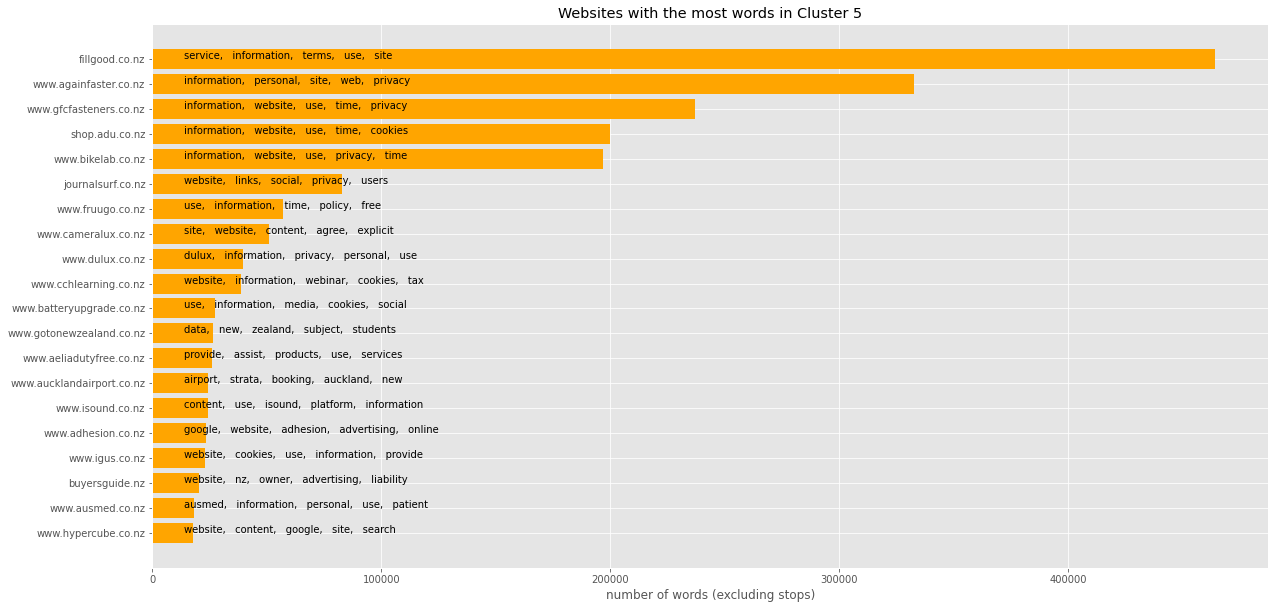

In [6]:
num_sites = 20
sites_subset = cluster_5.sort_values(by='Filt_num_words', ascending=False).head(num_sites).iloc[::-1]

fig, ax = plt.subplots(figsize=(20, 10))
y_pos = range(num_sites)
y_names = sites_subset.head(num_sites)['Netloc']
x_width = sites_subset['Filt_num_words']

most_common = [
    ',   '.join([word for word, count in Counter(countsi).most_common(5)])
    for countsi in sites_subset['Filt_counts']          
]

ax.barh(y_pos, width=x_width, color="orange")
ax.set(xlabel="number of words (excluding stops)", yticks=y_pos, yticklabels=y_names, title="Websites with the most words in Cluster 5")
for i, wordsi in zip(y_pos, most_common):
    ax.text(0.03 * x_width.tolist()[-1], i, wordsi);

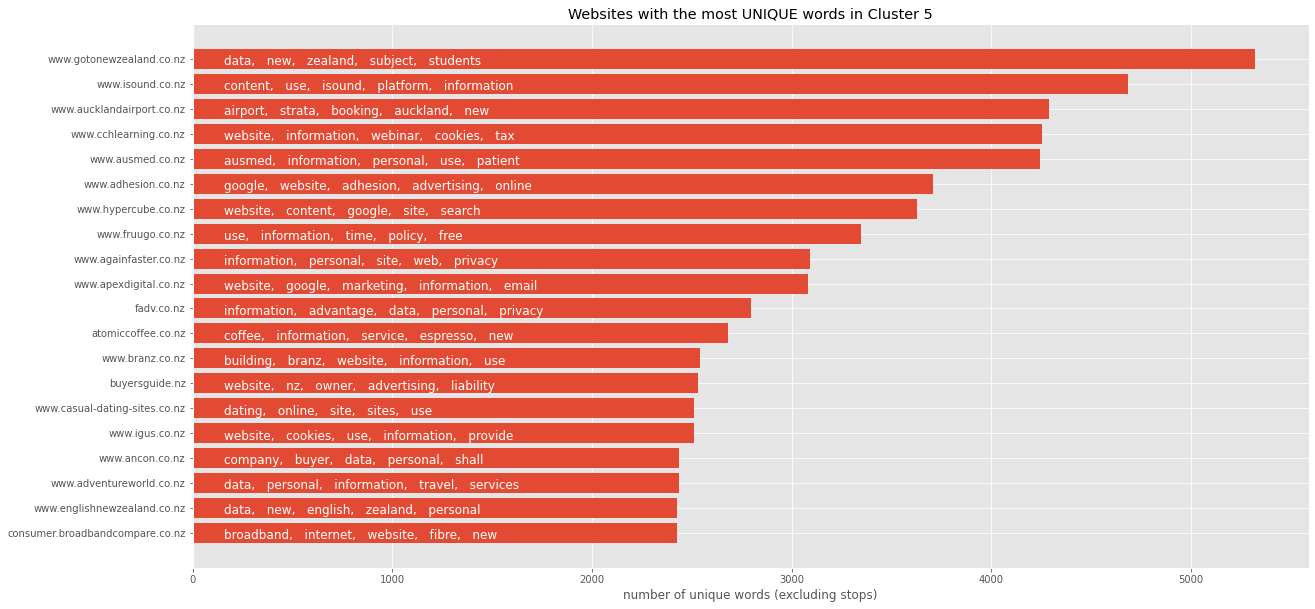

In [7]:
num_sites = 20
sites_subset2 = cluster_5.sort_values('Filt_num_unique_words', ascending=False).head(20).iloc[::-1]

fig, ax = plt.subplots(figsize=(20, 10))
y_pos = range(num_sites)
y_names = sites_subset2['Netloc']
x_width = sites_subset2['Filt_num_unique_words']

most_common = [
    ',   '.join([word for word, count in Counter(countsi).most_common(5)])
    for countsi in sites_subset2['Filt_counts']          
]

ax.barh(y_pos, width=x_width)
ax.set(xlabel="number of unique words (excluding stops)", yticks=y_pos, yticklabels=y_names, title="Websites with the most UNIQUE words in Cluster 5")
for i, wordsi in zip(y_pos, most_common):
    ax.text(0.03 * x_width.tolist()[-1], i - 0.25, wordsi, color='white', fontsize=12);

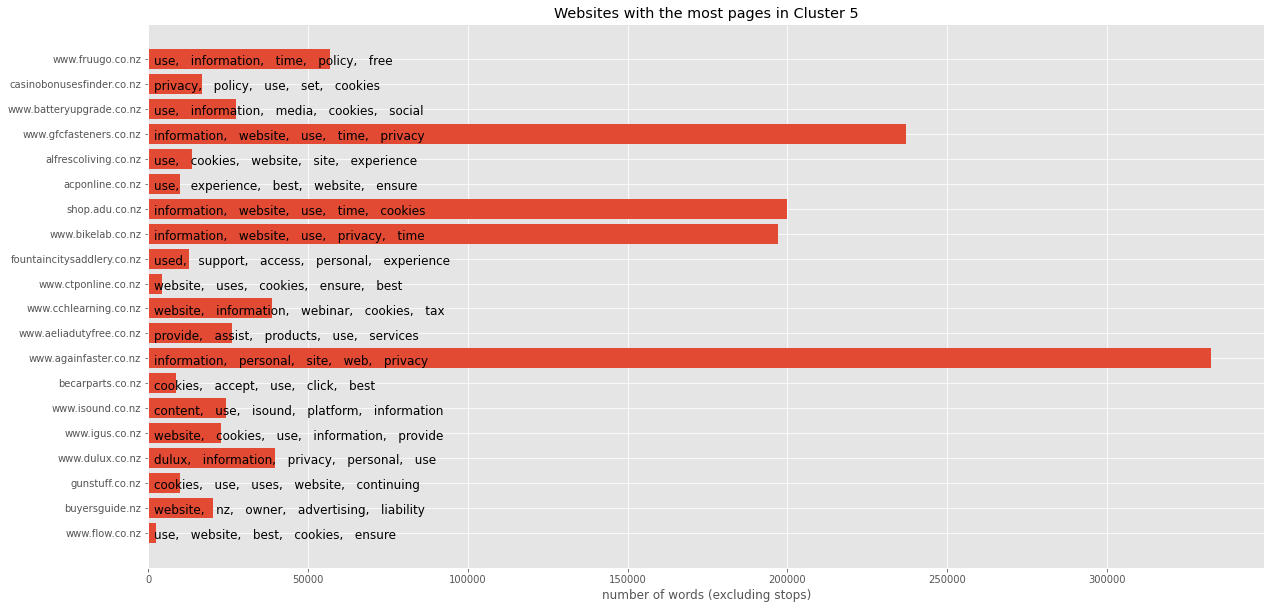

In [8]:
num_sites = 20
sites_subset3 = cluster_5.sort_values('Num_pages', ascending=False).head(20).iloc[::-1]

fig, ax = plt.subplots(figsize=(20, 10))
y_pos = range(num_sites)
y_names = sites_subset3['Netloc']
x_width = sites_subset3['Filt_num_words']

most_common = [
    ',   '.join([word for word, count in Counter(countsi).most_common(5)])
    for countsi in sites_subset3['Filt_counts']          
]

ax.barh(y_pos, width=x_width)
ax.set(xlabel="number of words (excluding stops)", yticks=y_pos, yticklabels=y_names, title="Websites with the most pages in Cluster 5")
for i, wordsi in zip(y_pos, most_common):
    ax.text(0.03 * x_width.tolist()[-1], i - 0.25, wordsi, color='black', fontsize=12);

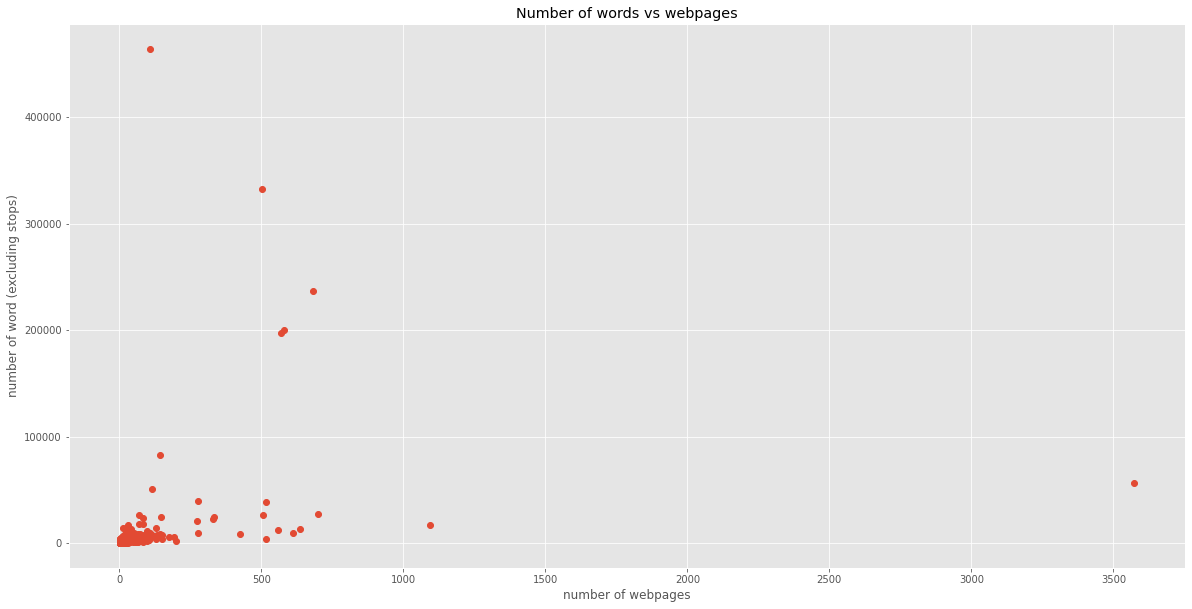

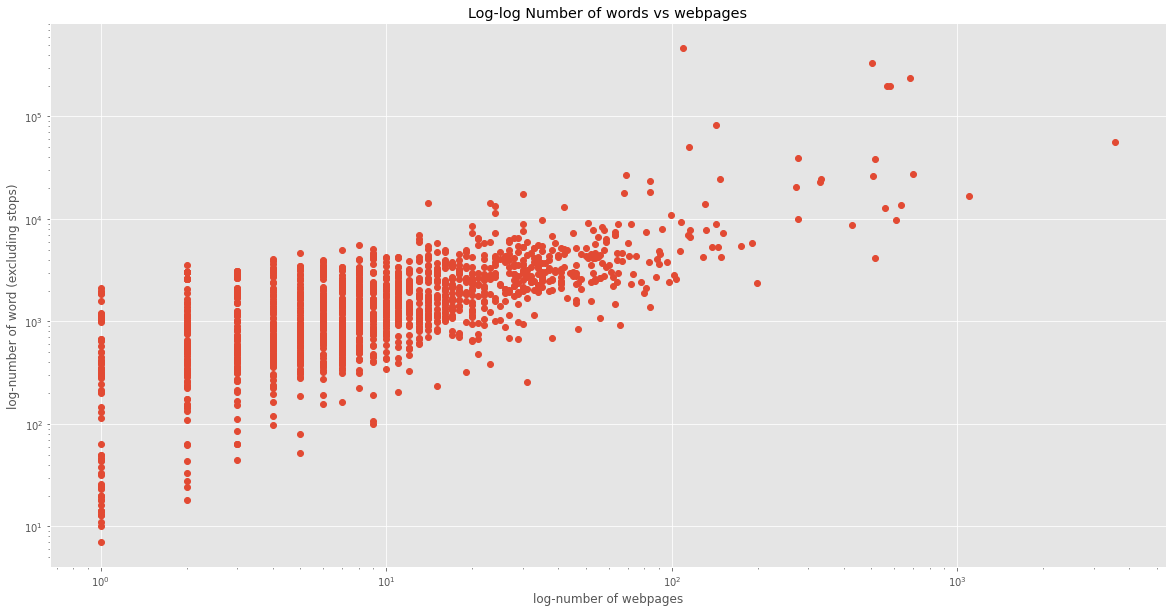

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(cluster_5['Num_pages'], cluster_5['Filt_num_words'], 'o')
ax.set(xlabel="number of webpages", ylabel="number of word (excluding stops)",
       title="Number of words vs webpages");

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(cluster_5['Num_pages'], cluster_5['Filt_num_words'], 'o')
ax.set(xlabel="log-number of webpages", ylabel="log-number of word (excluding stops)",
       title="Log-log Number of words vs webpages",
       xscale='log', yscale='log');

## Look into differences between clusters (number of words/webpages/websites).**

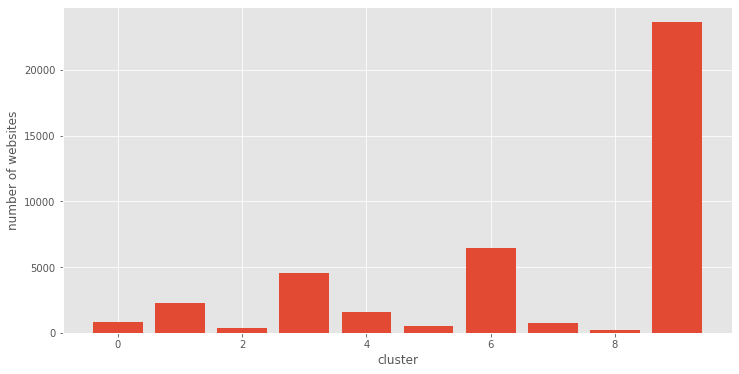

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel="cluster", ylabel="number of websites")
ax.bar(range(10), sites.groupby('KM_cluster').count().iloc[:, 0]);

In [11]:
sites['Num_pages'] = [texti.count(" | ") + 1 for texti in sites['Text']]
sites['Num_words'] = [sum(countsi.values()) for countsi in sites['Counts']]
sites['Num_filt_words'] = [sum(filt_countsi.values()) for filt_countsi in sites['Filt_counts']]

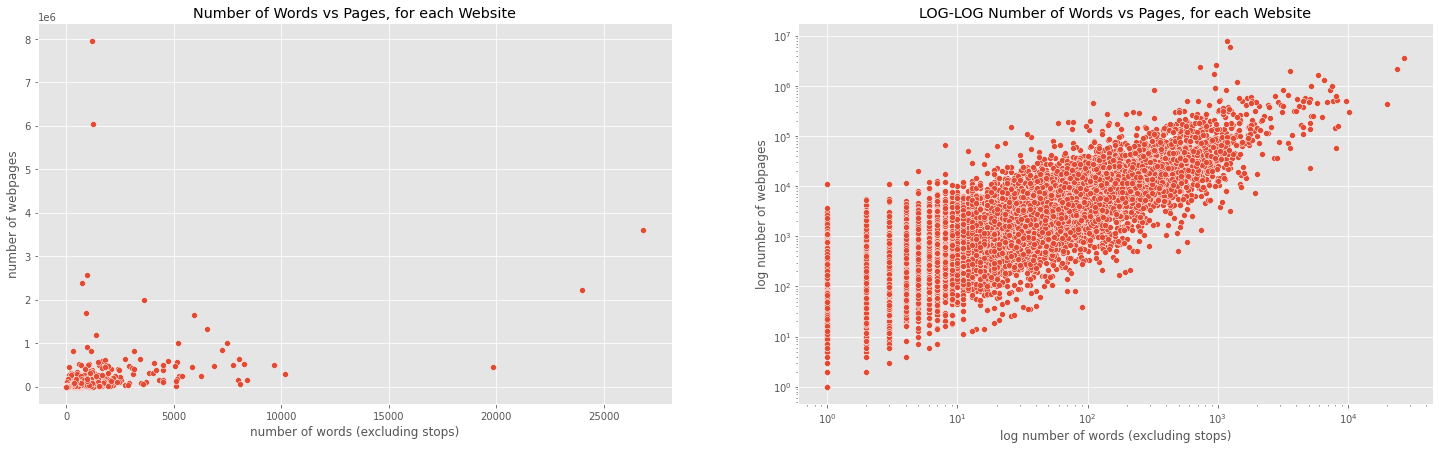

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7))
ax = axes.ravel()

ax[0].set(xlabel="number of words (excluding stops)", ylabel="number of webpages",
          title="Number of Words vs Pages, for each Website")
sns.scatterplot(data=sites, x='Num_pages', y='Num_filt_words',
                ax=ax[0])

ax[1].set(xlabel="log number of words (excluding stops)", ylabel="log number of webpages",
       xscale='log', yscale='log', title="LOG-LOG Number of Words vs Pages, for each Website")
sns.scatterplot(data=sites, x='Num_pages', y='Num_filt_words',
                ax=ax[1])

plt.savefig("plots/words-vs-pages.jpeg")
plt.show;

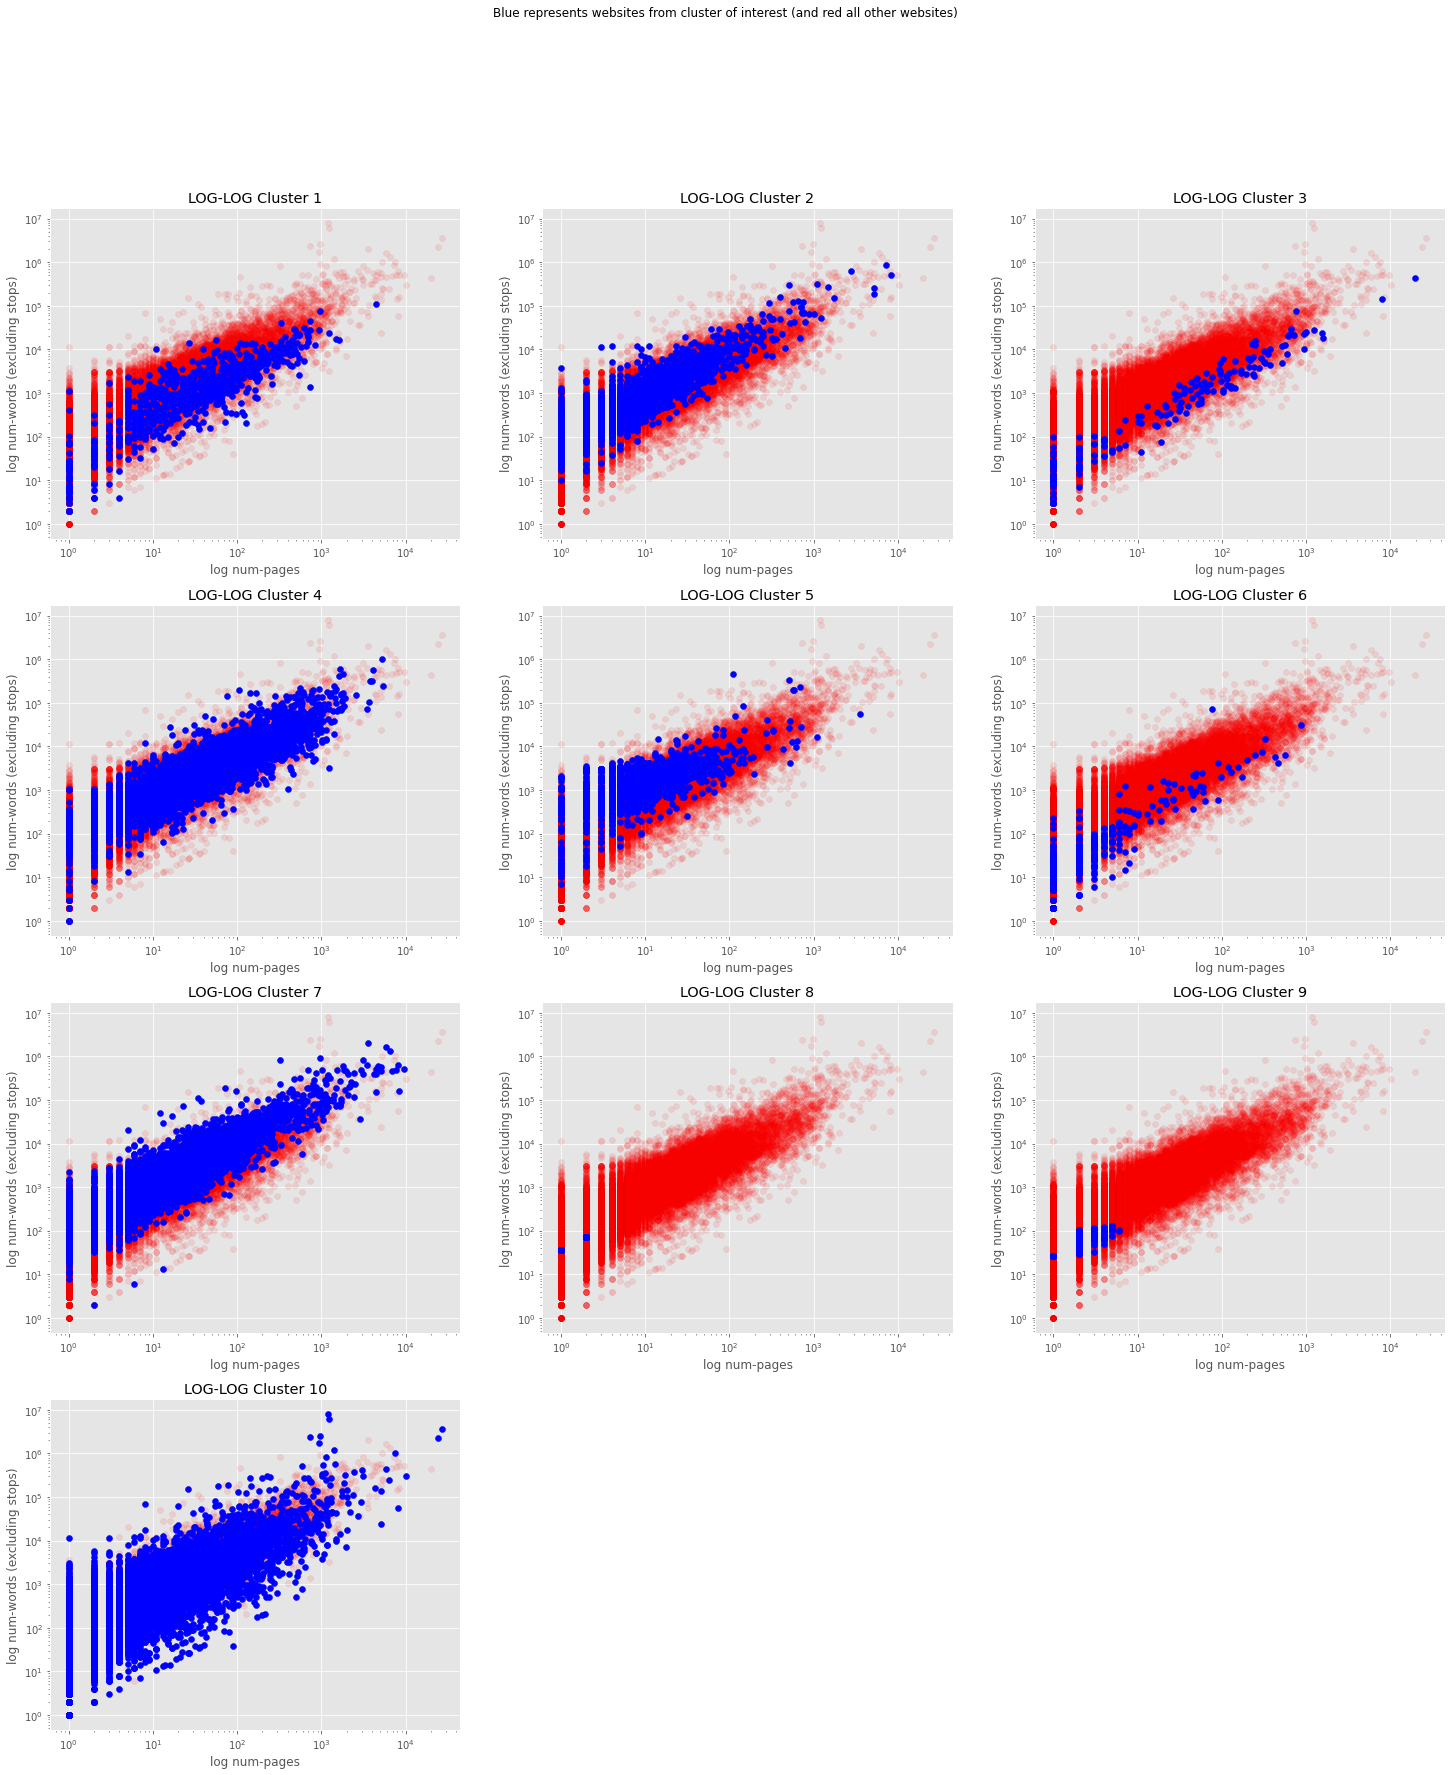

In [50]:
fig, axes = plt.subplots(4, 3, figsize=(25, 28))
ax = axes.ravel()

for i in range(len(ax)):
    if i < 10:
        ax[i].set(xscale='log', yscale='log', 
                  title=f"LOG-LOG Cluster {i + 1}", 
                  xlabel="log num-pages", ylabel="log num-words (excluding stops)")
        ax[i].scatter(x=sites[sites['KM_cluster'] != i]['Num_pages'],
                      y=sites[sites['KM_cluster'] != i]['Num_filt_words'],
                      color='red', alpha=0.1, label="Other clusters")
        ax[i].scatter(x=sites[sites['KM_cluster'] == i]['Num_pages'],
                      y=sites[sites['KM_cluster'] == i]['Num_filt_words'],
                      color='blue', label="Cluster of interest")
    else:
        ax[i].set(visible=False)

fig.suptitle("Blue represents websites from cluster of interest (and red all other websites)")
fig.savefig("plots/words_vs_pages_per_cluster.jpeg")
plt.show();

In [14]:
cluster_8 = sites[sites['KM_cluster'] == 7]
for i, x in enumerate(cluster_8['Text'].unique()): 
    print(f"{i}\n{repr(x)}")

0
'\n\nFast Domain Transfers\n\nTransferring a domain tends to take a long time a very long time actually. But who says it has to be like this?\n\n98% of the transactions conducted on DAN.COM are completed within 24 hours after payment!\n\nWe secure the domain from its current owner and send you the transfer instructions right after you pay.\n\nGetting a new domain no longer needs to take a lot of time!'
1
'\n\nFast Domain Transfers\n\nTransferring a domain tends to take a long time a very long time actually. But who says it has to be like this?\n\n98% of the transactions conducted on DAN.COM are completed within 24 hours after payment!\n\nWe secure the domain from its current owner and send you the transfer instructions right after you pay.\n\nGetting a new domain no longer needs to take a lot of time! | \n\nFast Domain Transfers\n\nTransferring a domain tends to take a long time a very long time actually. But who says it has to be like this?\n\n98% of the transactions conducted on DA

=> Cluster 8 has websites with identical text. The only difference between websites is having two webpages (which will duplicate the text into the 'Text' column).

In [15]:
cluster_9 = sites[sites['KM_cluster'] == 8]
cloudfare_text = "The website from which you got to this page is protected by Cloudflare. " \
                 "Email addresses on that page have been hidden in order to keep them from being accessed by malicious bots. " \
                 "You must enable Javascript in your browser in order to decode the e-mail address.\n\n" \
                 "If you have a website and are interested in protecting it in a similar way you can sign up for Cloudflare."
cloudfare_mask = cluster_9['Text'].str.contains(cloudfare_text)
looser_cloudfare_mask = cluster_9['Text'].str.contains("Cloudflare")

print(f"{sum(cloudfare_mask)} out of the {cluster_9.shape[0]} websites in Cluster 9 have the exact Cloudfare text.")
print(f"{sum(looser_cloudfare_mask)} out of the {cluster_9.shape[0]} websites in Cluster 9 contain the word 'Cloudflare'.")

174 out of the 243 websites in Cluster 9 have the exact Cloudfare text.
243 out of the 243 websites in Cluster 9 contain the word 'Cloudflare'.


In [16]:
sum(cluster_9['Text'].str.contains(cloudfare_text))

174

=> Cluster 9 are linked by mentions of Cloudflare.

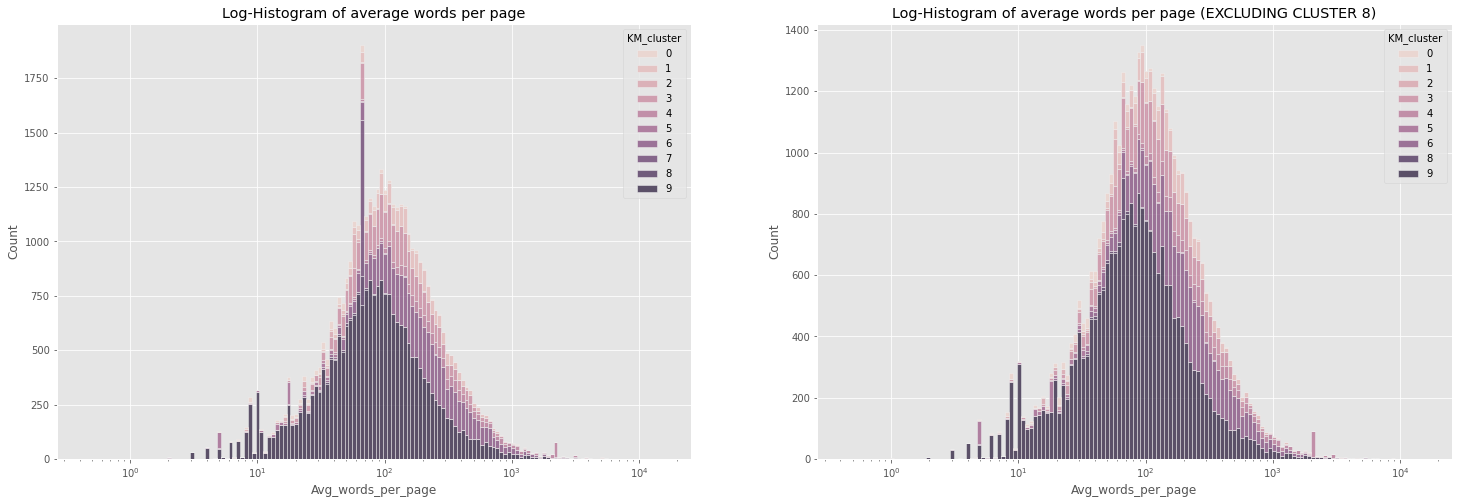

In [33]:
sites['Avg_words_per_page'] = sites['Num_words'] / sites['Num_pages']
excluding_mask = ~sites['KM_cluster'].isin([7]) # exclude cluster 9 (KM_cluster=8) as well?

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
ax[0].set(title="Log-Histogram of average words per page")
sns.histplot(sites, x='Avg_words_per_page',
             hue='KM_cluster', multiple='stack',
             log_scale=True,
             ax=ax[0])

ax[1].set(title="Log-Histogram of average words per page (EXCLUDING CLUSTER 8)")
sns.histplot(sites[excluding_mask], x='Avg_words_per_page', 
             hue='KM_cluster', multiple='stack',
             log_scale=True,
             ax=ax[1])

plt.show();

Most websites have about 1000 words per page.

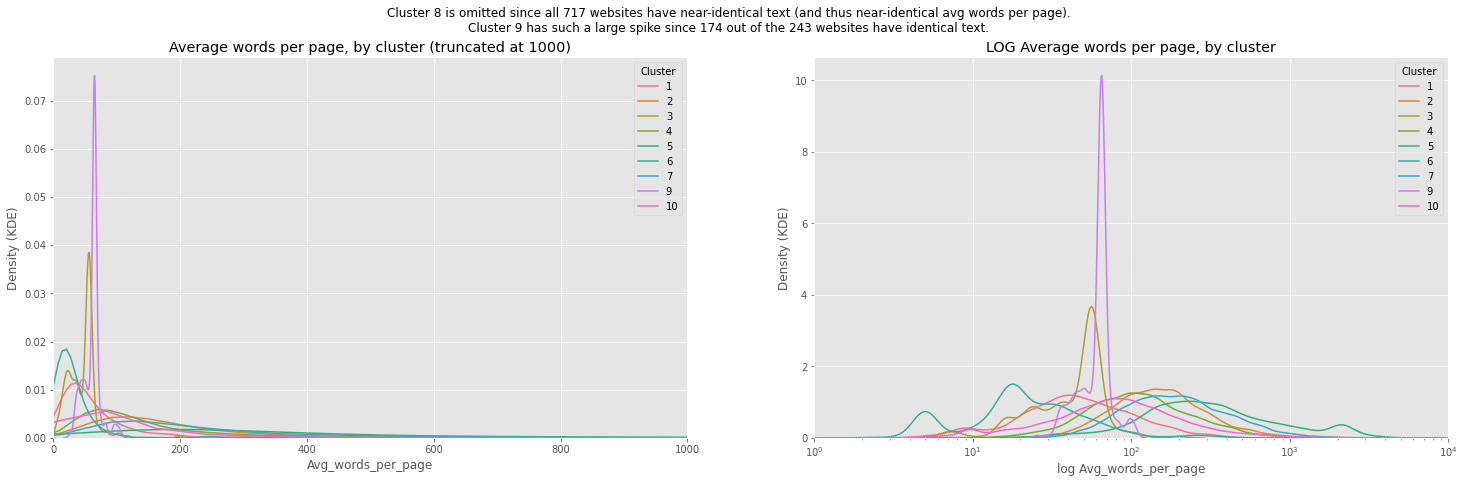

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7))
ax = axes.ravel()
for i, log_scale in enumerate([False, True]):
    for (clust_num, clust_sites), c in zip(sites.groupby('KM_cluster'), sns.color_palette("husl", 10)):
        if clust_num == 7: continue
        sns.kdeplot(clust_sites['Avg_words_per_page'], label=clust_num + 1, color=c,
                    bw_adjust=0.7, log_scale=log_scale, #shade=True,
                    ax=ax[i])
        
    ax[i].legend(title="Cluster")
    ax[i].set(ylabel="Density (KDE)")
    
fig.suptitle(f"Cluster 8 is omitted since all {cluster_8.shape[0]} websites have near-identical text (and thus near-identical avg words per page).\n"
             f"Cluster 9 has such a large spike since {sum(cloudfare_mask)} out of the {cluster_9.shape[0]} websites have identical text.")
ax[0].set(title="Average words per page, by cluster (truncated at 1000)", xlim=[0, 1000])
ax[1].set(title="LOG Average words per page, by cluster", xlabel="log Avg_words_per_page", xlim=[1, 1e4])
plt.show();

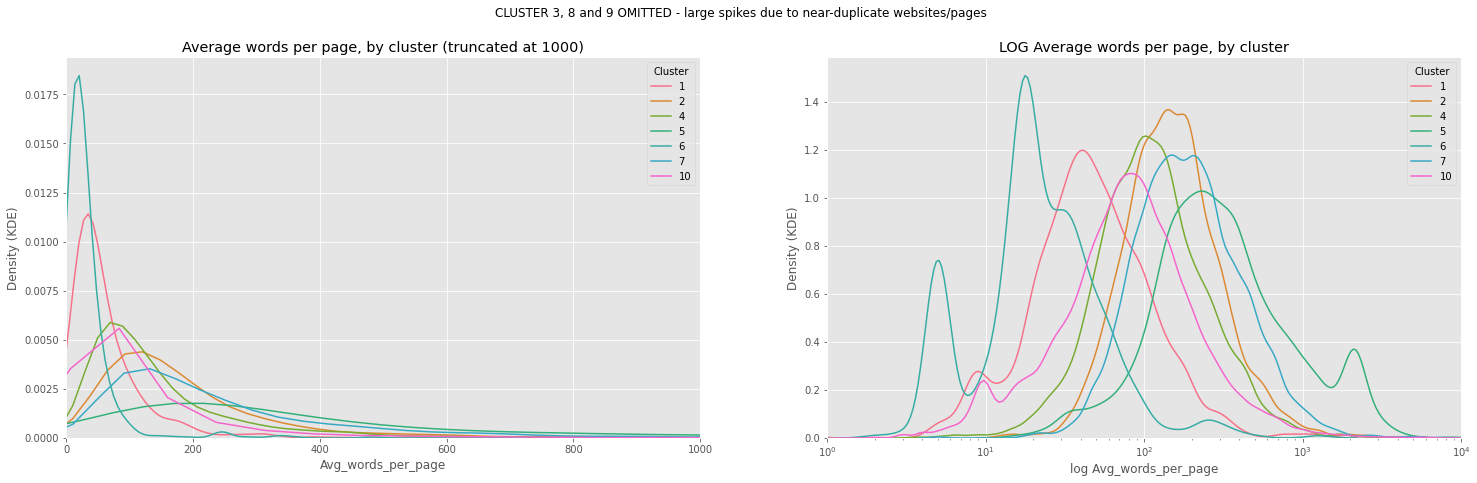

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7))
ax = axes.ravel()
for i, log_scale in enumerate([False, True]):
    for (clust_num, clust_sites), c in zip(sites.groupby('KM_cluster'), sns.color_palette("husl", 10)):
        if clust_num in [2, 7, 8]: continue
        sns.kdeplot(clust_sites['Avg_words_per_page'], label=clust_num + 1, color=c,
                    bw_adjust=0.7, log_scale=log_scale,
                    ax=ax[i])
        
    ax[i].legend(title="Cluster")
    ax[i].set(ylabel="Density (KDE)")
    
fig.suptitle("CLUSTER 3, 8 and 9 OMITTED - large spikes due to near-duplicate websites/pages")
ax[0].set(title="Average words per page, by cluster (truncated at 1000)", xlim=[0, 1000])
ax[1].set(title="LOG Average words per page, by cluster", xlabel="log Avg_words_per_page", xlim=[1, 1e4])

plt.savefig("plots/words_per_page_by_cluster.jpeg")
plt.show();

## Sentiment

In [20]:
from textblob import TextBlob
import random

In [21]:
sites.iloc[-1, :]['Text']

'Why Zoom?\n\nOne consistent enterprise experience for all use cases\n\nZoom’s cloud-based video communications technology is easy to deploy manage and scale. The whole Zoom platform is intuitive and reliable empowering your people to communicate with ease – and giving you complete real-time visibility of how the technology is being used.\n\nLet’s talk about how Zoom can work for your organisation. | As Zoom’s New Zealand partner and the only local Gold Certified Zoom Integrator we are uniquely positioned to support your business and its communications. We have a comprehensive team of skilled Zoom installers integrators and support staff to keep you up and running.\n\nSelect from pre-existing and proven room designs and hardware or use our in house design team to create a custom Zoom solution to suit your business requirements.\n\nIf you are looking for a premium Zoom experience then you’ve come to the right place.'

In [22]:
TextBlob(sites.iloc[-1, :]['Text']).sentiment.polarity

0.22804112554112552

In [23]:
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

In [24]:
%%time
sites.loc[:1000, 'Text'].apply(get_polarity)
# 24.5s for 100
# 45.7s for 1000

CPU times: user 43.5 s, sys: 1.2 s, total: 44.7 s
Wall time: 44.7 s


0       0.000000
1       0.556250
2       0.000000
3       0.344048
4      -0.200000
          ...   
996     0.292519
997     0.085971
998     0.258247
999     0.161373
1000    0.222441
Name: Text, Length: 1001, dtype: float64

In [25]:
%%time
# Take sample of 100 websites from each cluster and evaluate the sentiment to 
# estimate the sentiment of each cluster (using TextBlob).
random.seed(777)
clust_sample_idxs = [
    random.sample(sites[sites['KM_cluster'] == i].index.tolist(), 200)
    for i in range(10)
]

sent_estimate = np.array([
    sites.iloc[idxs, :]['Text'].apply(get_polarity)
    for idxs in clust_sample_idxs
])

CPU times: user 1min 18s, sys: 1.1 s, total: 1min 19s
Wall time: 1min 19s


In [26]:
sent_estimate.shape

(10, 200)

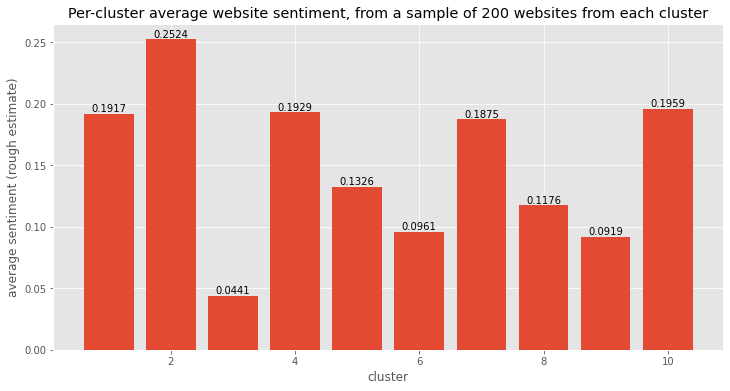

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel="cluster", ylabel="average sentiment (rough estimate)",
       title=f"Per-cluster average website sentiment, from a sample of {sent_estimate.shape[1]} websites from each cluster")
main = ax.bar(range(1, 11), sent_estimate.mean(axis=1).round(4))
ax.bar_label(main);

From looking at wordcloud:

Clusters 3, 8, & 9 are associated with faulty scrapes of websites and Cluster 6 is associated with logging in/authentication. \
=> These webpages will all involve fairly technical words which probably explains the low average sentiments.

Cluster 2 is accomodation.

Cluster 1 is "check out", purchasing and navigation.

In [28]:
sent_estimate.min(), sent_estimate.max()

(-0.5416666666666666, 1.0)

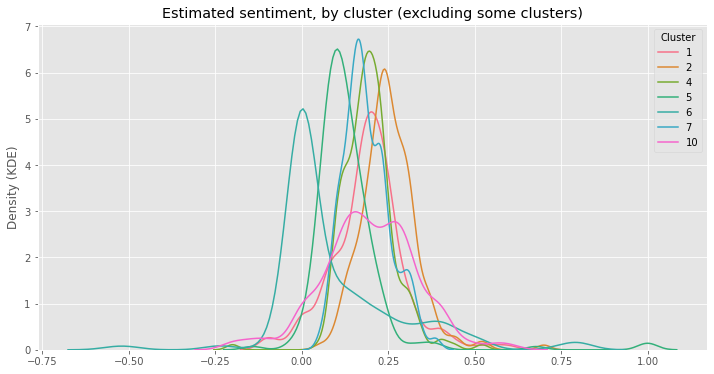

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

for clust_num, c in zip(range(10), sns.color_palette("husl", 10)):
    if clust_num in [2, 7, 8]: continue
    sns.kdeplot(sent_estimate[clust_num], label=clust_num + 1, color=c,
                bw_adjust=0.7,
                ax=ax)

ax.legend(title="Cluster")
ax.set(ylabel="Density (KDE)")
    
ax.set(title="Estimated sentiment, from sample of websites")
plt.show();

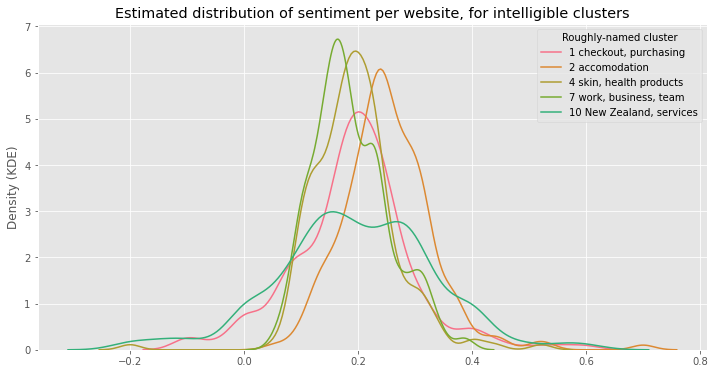

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
clust_info = [
    (0, 'checkout, purchasing'),
    (1, 'accomodation'),
    (3, 'skin, health products'),
    (6, 'work, business, team'),
    (9, 'New Zealand, services')
]
for (clust_num, clust_name), c in zip(clust_info, sns.color_palette("husl", 10)):
    sns.kdeplot(sent_estimate[clust_num], label=f"{clust_num + 1} {clust_name}", color=c,
                bw_adjust=0.7,
                ax=ax)

ax.legend(title="Roughly-named cluster")
ax.set(ylabel="Density (KDE)")
    
ax.set(title="Estimated distribution of sentiment per website, for intelligible clusters")

plt.savefig("plots/sentiment_distribution_per_cluster.jpeg")
plt.show();

None of these clusters seem to have any significantly positive/negative skews compared to the rest. Cluster 7 is slightly less positive, which is probably driven by more technical/less emotional words on those websites.

In [31]:
sites.iloc[clust_sample_idxs[6], :].head(10)

,Unnamed: 0,Netloc,Text,Counts,KM_cluster,Filt_counts,Num_pages,Num_words,Num_filt_words,Avg_words_per_page
16782,16782,housescan.co.nz,"When you contact us for a building inspection,...","{'when': 1, 'you': 4, 'contact': 1, 'us': 1, '...",6,"{'contact': 1, 'building': 5, 'inspection': 1,...",2,241,146,120.500000
29600,29600,www.conference.co.nz,Collaboration consultation solutions\n\nAs New...,"{'collaboration': 3, 'consultation': 2, 'solut...",6,"{'collaboration': 3, 'consultation': 2, 'solut...",25,3663,2075,146.520000
21158,21158,www.acreselectronics.co.nz,Are you looking for hi vis workwear NZ? If so ...,"{'are': 533, 'you': 1031, 'looking': 79, 'for'...",6,"{'looking': 79, 'hi': 90, 'vis': 80, 'workwear...",42,30983,14463,737.690476
36814,36814,www.growwaitaha.co.nz,Dr Cheryl Doig is a Leadership Futurist at Thi...,"{'dr': 3, 'cheryl': 1, 'doig': 1, 'is': 140, '...",6,"{'dr': 3, 'cheryl': 1, 'doig': 1, 'leadership'...",96,12468,6900,129.875000
35238,35238,www.frogpondreading.co.nz,Download your FREE Business Opportunity Report...,"{'download': 10, 'your': 52, 'free': 10, 'busi...",6,"{'download': 10, 'free': 10, 'business': 56, '...",9,2780,1456,308.888889
19786,19786,rks.casualfridays.nz,Delightful workers\n\nI would just like to say...,"{'delightful': 1, 'workers': 1, 'would': 2, 'j...",6,"{'delightful': 1, 'workers': 1, 'just': 3, 'li...",7,948,489,135.428571
27443,27443,www.capitalcityford.co.nz,Welcome to Capital City Ford!\n\nWe are a mult...,"{'welcome': 1, 'to': 805, 'capital': 34, 'city...",6,"{'welcome': 1, 'capital': 34, 'city': 34, 'for...",146,32378,18974,221.767123
21547,21547,www.afqy.co.nz,If you attend an AFQY event you will be introd...,"{'if': 42, 'you': 182, 'attend': 8, 'an': 54, ...",6,"{'attend': 8, 'afqy': 34, 'event': 48, 'introd...",36,9711,4844,269.750000
40582,40582,www.kahuilegal.co.nz,BACKGROUND\n\n1. The Government’s “Wellbeing B...,"{'background': 1, 'the': 222, 'government': 12...",6,"{'background': 1, 'government': 12, 'wellbeing...",11,3022,1727,274.727273
26100,26100,www.boostclean.co.nz,Residential Cleaning in Hamilton and Commercia...,"{'residential': 6, 'cleaning': 30, 'in': 35, '...",6,"{'residential': 6, 'cleaning': 30, 'hamilton':...",13,1504,829,115.692308
